# IS 362 - Week 5 Assignment
Sunah Lee

### Based on the data in GibHub, answer three questions using Python and pandas.

## Question 1: What is the northernmost airport in the US?

In [10]:
import pandas as pd
USairports = pd.read_csv('airports.csv')
USairports.sort_values("lat", ascending = False).head()

,faa,name,lat,lon,alt,tz,dst,tzone
417,EEN,Dillant Hopkins Airport,72.270833,42.898333,149,-5,A,NaN
230,BRW,Wiley Post Will Rogers Mem,71.285446,-156.766003,44,-9,A,America/Anchorage
110,AIN,Wainwright Airport,70.638056,-159.994722,41,-9,A,America/Anchorage
708,K03,Wainwright As,70.613378,-159.860350,35,-9,A,America/Anchorage
152,ATK,Atqasuk Edward Burnell Sr Memorial Airport,70.467300,-157.436000,96,-9,A,America/Anchorage


### Answer: Wiley Post Will Rogers Memorial Airport
I sorted the airports by the latitude value and found that Dillant Hopkins Airport has the highest latitude in the US. However, this answer looked odd on the map. Close look at the dataset show that even though the Wiley Post Will Rogers Memorial airport is has lower latitude value, it is the northernmost airport in the US.
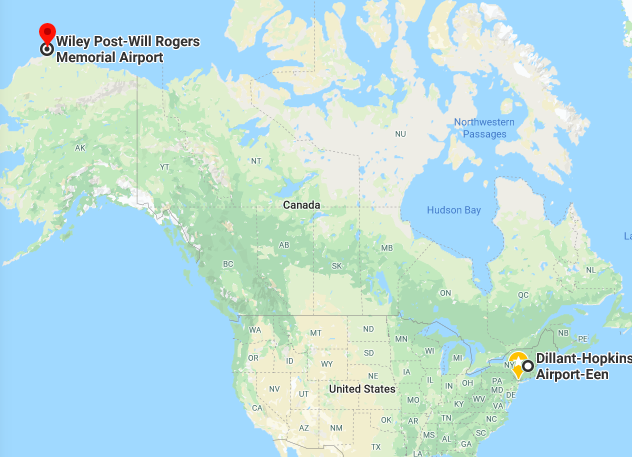

## Question 2: What is the easternmost airport in the US?

In [19]:
USairports.sort_values("lon", ascending = False).head()

,faa,name,lat,lon,alt,tz,dst,tzone
1290,SYA,Eareckson As,52.712275,174.113620,98,-9,A,America/Anchorage
942,MYF,Montgomery Field,32.475900,117.759000,17,8,A,Asia/Chongqing
396,DVT,Deer Valley Municipal Airport,33.411700,112.457000,1478,8,A,Asia/Chongqing
417,EEN,Dillant Hopkins Airport,72.270833,42.898333,149,-5,A,NaN
444,EPM,Eastport Municipal Airport,44.910111,-67.012694,45,-5,A,America/New_York


Initially, the result yielded Eareckson As as the airport with the largest longitude. However, this was incorrect.
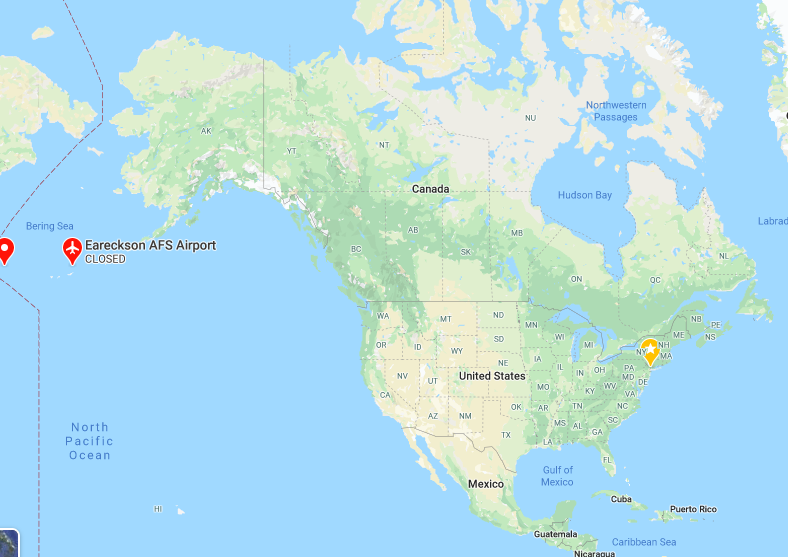
You can see from the map that this airport is actually far on the West. However, the longitude was large because the airport happens to be located east of the Prime Meridian. A few airports had the same issue. So the formula had to be adjusted as below.

In [18]:
df = pd.read_csv('airports.csv')
eastern_airports = df[(df['lat'] > 44) & (df['lat'] <= 50) & (df['lon'] >= -75) & (df['lon'] <= -65)]
eastern_airports.sort_values('lon', ascending=False).head()

,faa,name,lat,lon,alt,tz,dst,tzone
444,EPM,Eastport Municipal Airport,44.910111,-67.012694,45,-5,A,America/New_York
624,HUL,Houlton Intl,46.123083,-67.792056,489,-5,A,America/New_York
259,CAR,Caribou Muni,46.871500,-68.017917,626,-5,A,America/New_York
1101,PQI,Northern Maine Rgnl At Presque Isle,46.688958,-68.044797,534,-5,A,America/New_York
1398,WFK,Northern Aroostook Regional Airport,47.285556,-68.312778,988,-5,A,America/New_York


### Answer: Eastport Municipal Airport
With the corrected formula accounting for the outliers, I found that the Eastport Municipal Airport is the Easternmost airport in US.
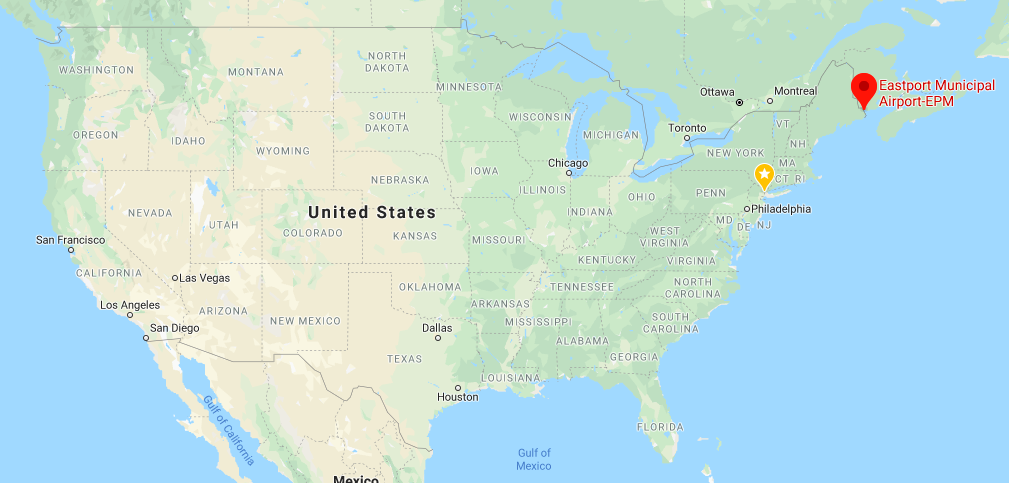

## Question 3: On February 12th, 2013, which New York area airport had the windiest weather?

In [21]:
weather = pd.read_csv('weather.csv')
wind_ny = weather[(weather["month"]==2) & (weather["day"]==12) & (weather["year"]==2013)]
wind_ny.head()
wind_ny.sort_values("wind_speed", ascending=False).head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
1009,EWR,2013,2,12,3,39.02,26.96,61.63,260.0,1048.36058,NaN,0.0,1008.3,10.0,2013-02-12T08:00:00Z
18417,LGA,2013,2,12,2,42.98,26.06,50.94,290.0,23.01560,31.07106,0.0,1007.1,10.0,2013-02-12T07:00:00Z
1018,EWR,2013,2,12,12,44.06,26.06,48.87,270.0,21.86482,31.07106,0.0,1012.5,10.0,2013-02-12T17:00:00Z
18428,LGA,2013,2,12,13,44.06,23.00,43.02,300.0,21.86482,25.31716,0.0,1011.7,10.0,2013-02-12T18:00:00Z
18429,LGA,2013,2,12,14,44.06,23.00,43.02,300.0,20.71404,25.31716,0.0,1011.5,10.0,2013-02-12T19:00:00Z


### Answer: EWR
Of the three airports in the New York area (EWR, JFK, and LGA), EWR had a record wind speed of 1048.36058 on February 12th, 2013. Based solely on the data given, the answer would be EWR. However, it seems like this is a error because the speed is too unrealistic. Logically, the second on the list, LGA with wind speed of 23.01560 makes more sense.
